# Describe the elevation of the star during the night

In [1]:
import urllib
import IPython.display
import numpy as np
import astropy

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo

In [4]:
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd

In [5]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [6]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

## Define Coordinates Systems

In [7]:
hd_158485_starloc=astropy.coordinates.SkyCoord.from_name('HD158485')

In [8]:
from astropy.coordinates import Longitude, Latitude
NOFS_Longitude=Longitude(u'-111°44′25″') 
NOFS_Latitude=Latitude(u'35°11′03″')
NOFS_Height=2.273*u.m 

In [9]:
#definition of the location to astropy
NOFS_location = astropy.coordinates.EarthLocation(lat=NOFS_Latitude, lon=NOFS_Longitude, height=NOFS_Height)

In [10]:
from astropy.coordinates import get_sun
utcoffset=utcoffset = -7*u.hour  # Mountain  Daylight Time
midnight = Time('2016-5-11 00:00:00') - utcoffset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour

times_May10_to_11 = midnight + delta_midnight
frame_May10_to_11 = AltAz(obstime=times_May10_to_11, location=NOFS_location)
sunaltazs_May10_to_11 = get_sun(times_May10_to_11).transform_to(frame_May10_to_11)

If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]


In [11]:
hd_158485_altazs_May10_to_11 = hd_158485_starloc.transform_to(frame_May10_to_11 )

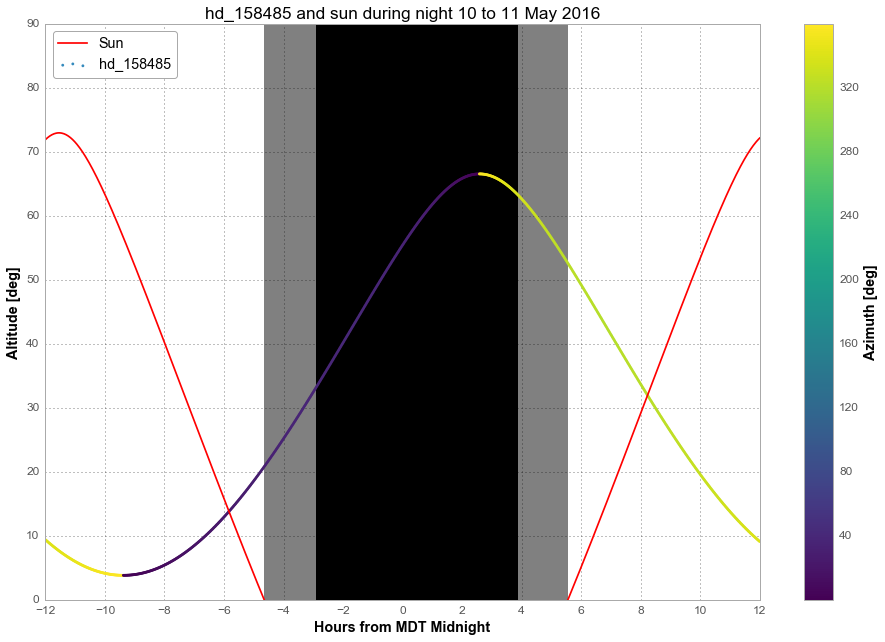

In [12]:
plt.figure(figsize=(16.,10.))
plt.plot(delta_midnight, sunaltazs_May10_to_11.alt, color='r', label='Sun')
plt.scatter(delta_midnight, hd_158485_altazs_May10_to_11.alt,
            c=hd_158485_altazs_May10_to_11.az, label='hd_158485', lw=0, s=8,
            cmap='viridis')

# plot astronomical crepuscule
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_May10_to_11.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_May10_to_11.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(0, 90)
plt.title('hd_158485 and sun during night 10 to 11 May 2016')
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

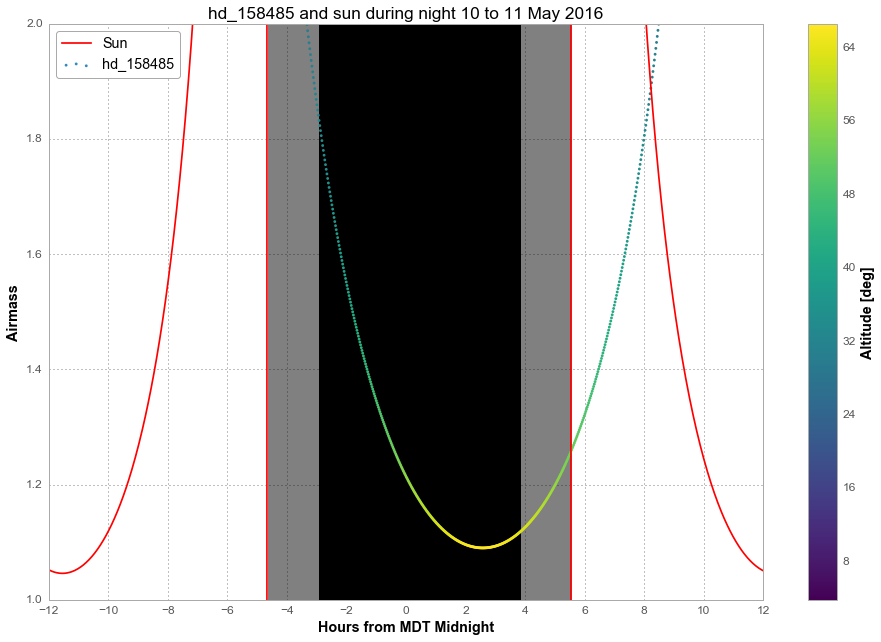

In [13]:
plt.figure(figsize=(16.,10.))
plt.plot(delta_midnight, sunaltazs_May10_to_11.secz, color='r', label='Sun')
plt.scatter(delta_midnight, hd_158485_altazs_May10_to_11.secz,
            c=hd_158485_altazs_May10_to_11.alt, label='hd_158485', lw=0, s=8,
            cmap='viridis')

# plot astronomical twillight
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May10_to_11.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May10_to_11.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Altitude [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(1., 2.)
plt.title('hd_158485 and sun during night 10 to 11 May 2016')
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Airmass')
plt.show()

## Read the logbook table

In [14]:
tablefile_HD158485_PSF='HD158485_grat_1-13_TablePSF_night20160510.fits'
tablefile_HD158485_PSF_with_AM='HD158485_grat_1-13_TablePSF_night20160510_withAM.fits'

In [15]:
t = Table.read(tablefile_HD158485_PSF)

In [16]:
t.show_in_notebook()

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay
1,AssScImHD158485_grat_1.fits,2016-05-11T05:58:59.852,1.5,32,4.59516684466,4.77633085449,0.669748518204,0.633033961784,4.33783750136,4.50885632664
2,AssScImHD158485_grat_2.fits,2016-05-11T05:59:35.430,1.5,20,4.36764093337,4.27710462183,0.253070362051,0.480219677255,4.1230530411,4.03758676301
3,AssScImHD158485_grat_3.fits,2016-05-11T06:00:39.034,1.5,21,3.11745978946,3.37662120697,0.141785922328,0.291356294233,2.94288204125,3.18753041938
4,AssScImHD158485_grat_4.fits,2016-05-11T06:04:28.397,5.0,44,3.20254070405,3.54157179463,0.253742310559,0.732325225588,3.02319842463,3.34324377413
5,AssScImHD158485_grat_5.fits,2016-05-11T06:04:37.465,5.0,40,3.3337821852,3.69825493689,0.197919263153,0.712456743168,3.14709038283,3.49115266042
6,AssScImHD158485_grat_6.fits,2016-05-11T06:04:46.678,5.0,51,3.22342719729,3.57597468963,0.22727713948,0.784218480413,3.04291527424,3.37572010701
7,AssScImHD158485_grat_7.fits,2016-05-11T06:04:55.971,5.0,43,3.06221826786,3.54834731387,0.274848952559,0.794321902288,2.89073404486,3.34963986429
8,AssScImHD158485_grat_8.fits,2016-05-11T06:05:04.595,5.0,50,3.20182477857,3.46410505349,0.518441965741,0.916487419153,3.02252259097,3.27011517049
9,AssScImHD158485_grat_9.fits,2016-05-11T06:05:58.173,0.5,7,3.12579168451,3.48152512138,0.106598705227,0.0555052401655,2.95074735018,3.28655971458
10,AssScImHD158485_grat_10.fits,2016-05-11T06:06:02.576,0.5,8,2.91946061474,3.27675572088,0.170637596519,0.37481715011,2.75597082032,3.09325740051


### retrieve the time and the number from the table

In [17]:
all_date_str=t['time']

In [18]:
all_num=t['num']

In [19]:
NB_NUMBERS=all_num.shape[0]

In [20]:
series_time=Time(all_date_str)

In [21]:
NB_EXPOSURES=series_time.shape[0]

### Do the required transformation to get the airmass

In [22]:
all_frame_May10_to_11 = AltAz(obstime=series_time, location=NOFS_location)

- frame for observed object

In [23]:
all_hd_158485_altazs_May10_to_11 = hd_158485_starloc.transform_to(all_frame_May10_to_11 )

- calculate azimuth

In [24]:
all_hd_158485_altazs_May10_to_11_az=all_hd_158485_altazs_May10_to_11.az

- calculate elevation

In [25]:
all_hd_158485_altazs_May10_to_11_alt=all_hd_158485_altazs_May10_to_11.alt

- Calculate airmass

In [26]:
all_hd_158485_altazs_May10_to_11_airmass=all_hd_158485_altazs_May10_to_11.secz

- Create the columns

In [27]:
all_hd_158485_altazs_May10_to_11_az

<Longitude [ 38.92577699, 38.90688956, 38.87235456, 38.73951518,
             38.73399292, 38.72836109, 38.72265862, 38.7173471 ,
             38.68392544, 38.68114639, 38.6782453 , 38.67525703,
             38.67234758] deg>

In [28]:
t['azimuth']=all_hd_158485_altazs_May10_to_11_az

In [29]:
all_hd_158485_altazs_May10_to_11_alt

<Latitude [ 47.84107192, 47.91738996, 48.0537477 , 48.54458833,
            48.56396439, 48.5836479 , 48.60349988, 48.62192051,
            48.73631357, 48.74571058, 48.75550183, 48.76556772,
            48.77534917] deg>

In [30]:
t['altitude']=all_hd_158485_altazs_May10_to_11_alt

In [31]:
all_hd_158485_altazs_May10_to_11_airmass

<Quantity [ 1.34900714, 1.34738333, 1.3444977 , 1.33427417, 1.33387578,
            1.33347148, 1.33306412, 1.3326865 , 1.3303493 , 1.3301579 ,
            1.32995858, 1.32975376, 1.32955483]>

In [32]:
t['airmass']=all_hd_158485_altazs_May10_to_11_airmass

In [33]:
t.show_in_notebook()

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay,azimuth,altitude,airmass
,,,,,,,,,,,deg,deg,
1,AssScImHD158485_grat_1.fits,2016-05-11T05:58:59.852,1.5,32,4.59516684466,4.77633085449,0.669748518204,0.633033961784,4.33783750136,4.50885632664,38.9257769944,47.841071918,1.34900713748
2,AssScImHD158485_grat_2.fits,2016-05-11T05:59:35.430,1.5,20,4.36764093337,4.27710462183,0.253070362051,0.480219677255,4.1230530411,4.03758676301,38.9068895615,47.9173899634,1.34738332675
3,AssScImHD158485_grat_3.fits,2016-05-11T06:00:39.034,1.5,21,3.11745978946,3.37662120697,0.141785922328,0.291356294233,2.94288204125,3.18753041938,38.8723545592,48.0537476962,1.34449769692
4,AssScImHD158485_grat_4.fits,2016-05-11T06:04:28.397,5.0,44,3.20254070405,3.54157179463,0.253742310559,0.732325225588,3.02319842463,3.34324377413,38.7395151753,48.5445883273,1.33427416819
5,AssScImHD158485_grat_5.fits,2016-05-11T06:04:37.465,5.0,40,3.3337821852,3.69825493689,0.197919263153,0.712456743168,3.14709038283,3.49115266042,38.7339929203,48.5639643938,1.33387578357
6,AssScImHD158485_grat_6.fits,2016-05-11T06:04:46.678,5.0,51,3.22342719729,3.57597468963,0.22727713948,0.784218480413,3.04291527424,3.37572010701,38.7283610922,48.5836479006,1.33347147739
7,AssScImHD158485_grat_7.fits,2016-05-11T06:04:55.971,5.0,43,3.06221826786,3.54834731387,0.274848952559,0.794321902288,2.89073404486,3.34963986429,38.7226586174,48.6034998782,1.33306411825
8,AssScImHD158485_grat_8.fits,2016-05-11T06:05:04.595,5.0,50,3.20182477857,3.46410505349,0.518441965741,0.916487419153,3.02252259097,3.27011517049,38.7173471048,48.6219205101,1.33268649568
9,AssScImHD158485_grat_9.fits,2016-05-11T06:05:58.173,0.5,7,3.12579168451,3.48152512138,0.106598705227,0.0555052401655,2.95074735018,3.28655971458,38.683925444,48.7363135667,1.33034929618


In [34]:
t.write(tablefile_HD158485_PSF_with_AM,format='fits')